In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import tensorflow as tf
from keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
tf.config.experimental_run_functions_eagerly(True)

Instructions for updating:
Use `tf.config.run_functions_eagerly` instead of the experimental version.


In [2]:
img_dir = r'C:\Users\Kartik\Desktop\photoofcancer\brain_tumor_dataset'

In [3]:
BATCH_SIZE=64
IMAGE_SIZE=150
input_shape = (150,150,1)

In [4]:
data_gen = ImageDataGenerator(rescale=1./255,validation_split = 0.2)

In [5]:
train_gen = data_gen.flow_from_directory(img_dir,target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                        batch_size = BATCH_SIZE,
                                        color_mode="grayscale",
                                        shuffle=True,
                                        class_mode ="categorical",
                                        subset ="training")

Found 203 images belonging to 2 classes.


In [6]:
val_gen = data_gen.flow_from_directory(
    img_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    color_mode="grayscale",
    subset="validation"
)

Found 50 images belonging to 2 classes.


In [7]:
labels = train_gen.class_indices
classes = list(labels.keys())

print(classes)

['no', 'yes']


In [8]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, BatchNormalization, Flatten, Dropout


model = Sequential()
model.add(keras.layers.InputLayer(input_shape=(150,150,1)))
model.add(Conv2D(16,(3,3),activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32,(3,3),activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(512,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))

C:\Users\Kartik\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [9]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 16)        │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 41472)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      21,234,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │           1,026 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,240,002 (81.02 MB)

 Trainable params: 21,240,002 (81.02 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
with tf.device('/device:GPU:0'):
    history = model.fit(train_gen, verbose=1, epochs=5, 
                        validation_data=val_gen, 
                        steps_per_epoch=3681//64, 
                        validation_steps=919//64)

Epoch 1/5


C:\Users\Kartik\anaconda3\Lib\site-packages\tensorflow\python\data\ops\structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
C:\Users\Kartik\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 4/57 ━━━━━━━━━━━━━━━━━━━━ 27s 523ms/step - accuracy: 0.4950 - loss: 2.7398

C:\Users\Kartik\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.5019 - loss: 3.5307 - val_accuracy: 0.3800 - val_loss: 4.1379
Epoch 2/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.6406 - loss: 1.0427 - val_accuracy: 0.6800 - val_loss: 1.2122
Epoch 3/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.6820 - loss: 0.7769 - val_accuracy: 0.7600 - val_loss: 0.5892
Epoch 4/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.7717 - loss: 0.4799 - val_accuracy: 0.7200 - val_loss: 0.5557
Epoch 5/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.8171 - loss: 0.4153 - val_accuracy: 0.7600 - val_loss: 0.5136


In [12]:
test_loss, test_acc = model.evaluate(val_gen)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step - accuracy: 0.7600 - loss: 0.5136


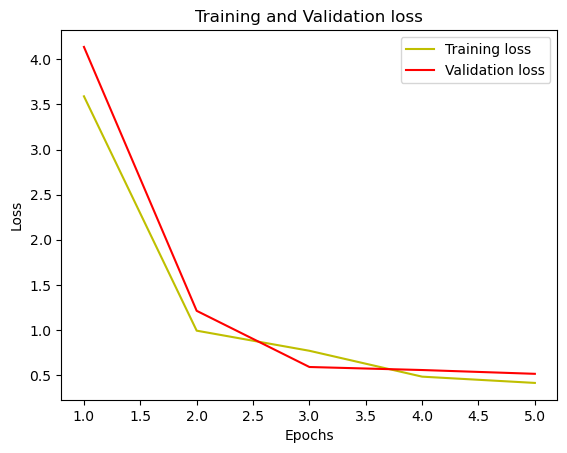

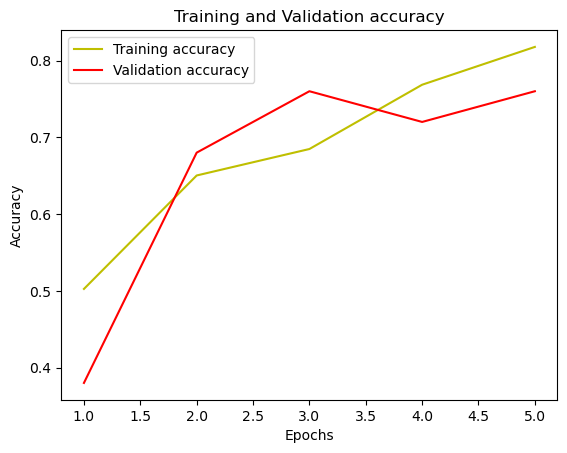

In [13]:
loss = history.history['loss']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label="Validation loss")
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epochs, history.history['accuracy'], 'y', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label="Validation accuracy")
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [14]:
model.save('my_model.keras')

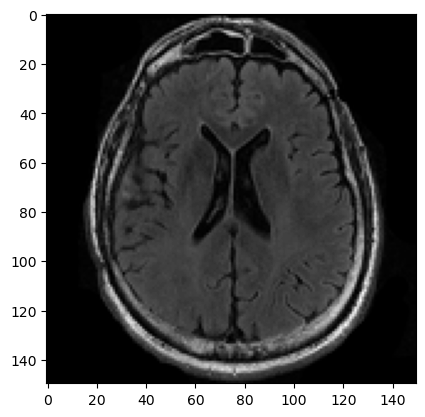

In [15]:
from matplotlib.pyplot import imshow
from PIL import Image,ImageOps

image_path = r'C:\Users\Kartik\Desktop\photoofcancer\brain_tumor_dataset\no\7 no.jpg'
image = Image.open(image_path)
size = (150,150)
image = ImageOps.grayscale(image)
image = image.resize(size, resample=Image.LANCZOS)
image_array=np.asarray(image)
plt.imshow(image_array, cmap='gray')
plt.show()

In [16]:
data=image_array.reshape((-1,150,150,1))

prediction = model.predict(data)
print(prediction[0][0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1.0


Found 203 images belonging to 2 classes.
Found 50 images belonging to 2 classes.
['no', 'yes']


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 148, 148, 16)        │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 74, 74, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 72, 72, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 36, 36, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 41472)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │      21,234,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2)                   │           1,026 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,240,002 (81.02 MB)

 Trainable params: 21,240,002 (81.02 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - accuracy: 0.5301 - loss: 1.0009 - val_accuracy: 0.6600 - val_loss: 0.7401
Epoch 2/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.7289 - loss: 0.6475 - val_accuracy: 0.7400 - val_loss: 0.7153
Epoch 3/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.8086 - loss: 0.4691 - val_accuracy: 0.6800 - val_loss: 0.5463
Epoch 4/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.7966 - loss: 0.4600 - val_accuracy: 0.7200 - val_loss: 0.5480
Epoch 5/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.8277 - loss: 0.3950 - val_accuracy: 0.7400 - val_loss: 0.5300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step - accuracy: 0.7400 - loss: 0.5300


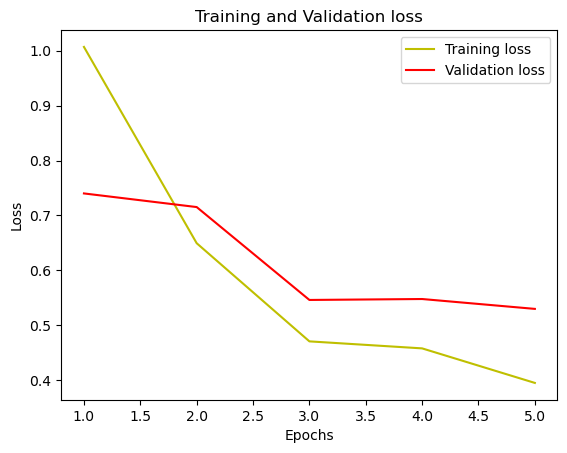

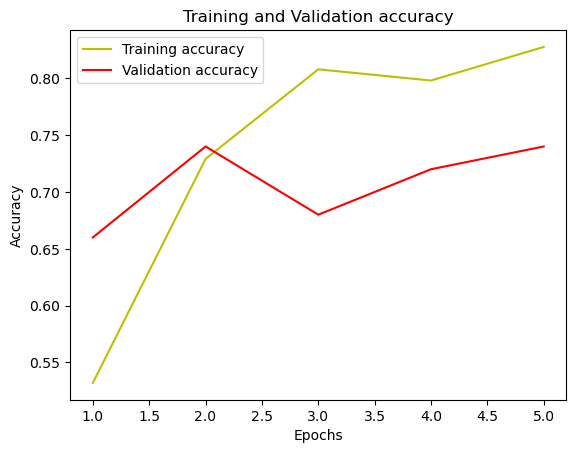

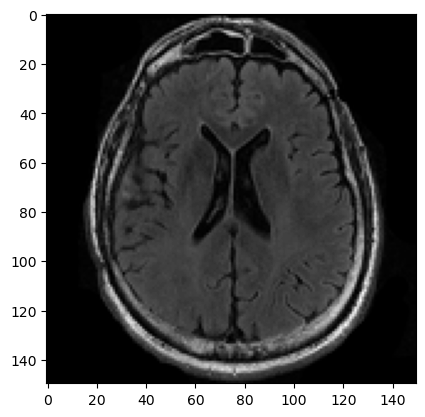

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1.0


In [18]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import tensorflow as tf
from keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
tf.config.experimental_run_functions_eagerly(True)

img_dir = r'C:\Users\Kartik\Desktop\photoofcancer\brain_tumor_dataset'

BATCH_SIZE=64
IMAGE_SIZE=150
input_shape = (150,150,1)

data_gen = ImageDataGenerator(rescale=1./255,validation_split = 0.2)

train_gen = data_gen.flow_from_directory(img_dir,target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                        batch_size = BATCH_SIZE,
                                        color_mode="grayscale",
                                        shuffle=True,
                                        class_mode ="categorical",
                                        subset ="training")

val_gen = data_gen.flow_from_directory(
    img_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    color_mode="grayscale",
    subset="validation"
)

labels = train_gen.class_indices
classes = list(labels.keys())

print(classes)

from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, BatchNormalization, Flatten, Dropout


model = Sequential()
model.add(keras.layers.InputLayer(input_shape=(150,150,1)))
model.add(Conv2D(16,(3,3),activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32,(3,3),activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(512,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


model.summary()



with tf.device('/device:GPU:0'):
    history = model.fit(train_gen, verbose=1, epochs=5, 
                        validation_data=val_gen, 
                        steps_per_epoch=3681//64, 
                        validation_steps=919//64)

test_loss, test_acc = model.evaluate(val_gen)

loss = history.history['loss']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label="Validation loss")
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epochs, history.history['accuracy'], 'y', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label="Validation accuracy")
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

model.save('module.h5')

from matplotlib.pyplot import imshow
from PIL import Image,ImageOps

image_path = r'C:\Users\Kartik\Desktop\photoofcancer\brain_tumor_dataset\no\7 no.jpg'
image = Image.open(image_path)
size = (150,150)
image = ImageOps.grayscale(image)
image = image.resize(size, resample=Image.LANCZOS)
image_array=np.asarray(image)
plt.imshow(image_array, cmap='gray')
plt.show()

data=image_array.reshape((-1,150,150,1))

prediction = model.predict(data)
print(prediction[0][0])

In [19]:
from sklearn import svm, metrics, datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load dataset
data = pd.read_csv("./dataset/Training.csv")

# Preprocess data
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Encode labels
encoder = LabelEncoder()
y = encoder.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train SVM Classifier
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)
preds = svm_model.predict(X_test)
print(f"Accuracy on train data by SVM Classifier: {accuracy_score(y_train, svm_model.predict(X_train))*100}")
print(f"Accuracy on test data by SVM Classifier: {accuracy_score(y_test, preds)*100}")
cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for SVM Classifier on Test Data")
plt.show()

# Train Naive Bayes Classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
preds = nb_model.predict(X_test)
print(f"Accuracy on train data by Naive Bayes Classifier: {accuracy_score(y_train, nb_model.predict(X_train))*100}")
print(f"Accuracy on test data by Naive Bayes Classifier: {accuracy_score(y_test, preds)*100}")
cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Naive Bayes Classifier on Test Data")
plt.show()

# Train Random Forest Classifier
rf_model = RandomForestClassifier(random_state=18)
rf_model.fit(X_train, y_train)
preds = rf_model.predict(X_test)
print(f"Accuracy on train data by Random Forest Classifier: {accuracy_score(y_train, rf_model.predict(X_train))*100}")
print(f"Accuracy on test data by Random Forest Classifier: {accuracy_score(y_test, preds)*100}")
cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Random Forest Classifier on Test Data")
plt.show()

# Train combined model on whole data
final_svm_model = svm.SVC()
final_nb_model = GaussianNB()
final_rf_model = RandomForestClassifier(random_state=18)
final_svm_model.fit(X, y)
final_nb_model.fit(X, y)
final_rf_model.fit(X, y)

# Load test data
test_data = pd.read_csv("./dataset/Testing.csv").dropna(axis=1)
test_X = test_data.iloc[:, :-1]
test_Y = encoder.transform(test_data.iloc[:, -1])

# Make predictions on test data
svm_preds = final_svm_model.predict(test_X)
nb_preds = final_nb_model.predict(test_X)
rf_preds = final_rf_model.predict(test_X)
final_preds = [mode([i,j,k])[0][0] for i,j,k in zip(svm_preds, nb_preds, rf_preds)]

print(f"Accuracy on Test dataset by the combined model: {accuracy_score(test_Y, final_preds)*100}")
cf_matrix = confusion_matrix(test_Y, final_preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Combined Model on Test Dataset")
plt.show()

# Create a function to take symptoms as input and generate predictions for disease
symptoms = X.columns.values
symptom_index = {}
for index, value in enumerate(symptoms):
    symptom = " ".join([i.capitalize() for i in value.split("_")])
    symptom_index[symptom] = index

data_dict = {
    "symptom_index": symptom_index,
    "predictions_classes": encoder.classes_
}

def predictDisease(symptoms):
    symptoms = symptoms.split(",")
    input_data = [0] * len(data_dict["symptom_index"])
    for symptom in symptoms:
        index = data_dict["symptom_index"][symptom]
        input_data[index] = 1
    svm_pred = final_svm_model.predict([input_data])[0]
    nb_pred = final_nb_model.predict([input_data])[0]
    rf_pred = final_rf_model.predict([input_data])[0]
    final_pred = mode([svm_pred, nb_pred, rf_pred])[0][0]
    return data_dict["predictions_classes"][final_pred]

FileNotFoundError: [Errno 2] No such file or directory: './dataset/Training.csv'